In [58]:
import os
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import warnings 
warnings.filterwarnings("ignore")


In [18]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.transform(X))

[0.89902384]
[9.13561054]
[[-4.59824756]
 [-1.29454697]
 [-4.48653916]
 [ 1.78573681]
 [ 3.85137493]
 [ 4.74222195]]


# Part 1

import data:

In [59]:
def read_text(file_path="p4dataset2018.txt"):
    with open(file_path, 'r') as file:
        result = np.array([line.split() for line in file.readlines()])
    return result

def transform_data(origin_data):
    x, y = origin_data.shape
    y -= 3
    m = stats.mode(origin_data[:,3:])[0][0]
    result = m != origin_data[:,3:]
    return result.astype('int32')
    


In [167]:
X_origin = read_text()
X = transform_data(X_origin)
print(X.shape)
print(X[0])

# counting label color
population_dict = {}
sex_dict = {}
color_dict = ['b','c','g','k','m','r','y','orange']
color_index_population = 0
color_index_sex = 0
for individual in X_origin:
    if individual[2] not in population_dict.keys():
        population_dict[individual[2]] = color_dict[color_index_population]
        color_index_population += 1
    if individual[1] not in sex_dict.keys():
        sex_dict[individual[1]] = color_dict[color_index_sex]
        color_index_sex += 1
print(population_dict)
print(sex_dict)

(995, 10101)
[0 1 0 ... 0 0 1]
{'ACB': 'b', 'GWD': 'c', 'ESN': 'g', 'MSL': 'k', 'YRI': 'm', 'LWK': 'r', 'ASW': 'y'}
{'1': 'b', '2': 'c'}


### a)

In [89]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [90]:
X_pca.shape

(995, 995)

### b) use 1,2, population

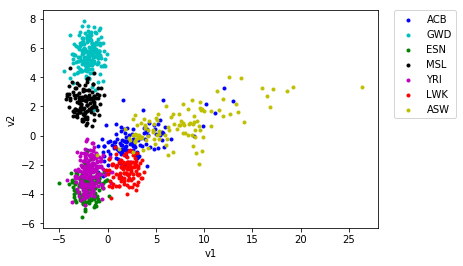

In [140]:
X_2 = X_pca[:,:2]
plt.xlabel('v1')
plt.ylabel('v2')
for population in population_dict.keys():
    indexes = np.where(X_origin[:,2]==population)
    scatter_plot = plt.scatter(X_2[indexes,0], X_2[indexes,1], c=population_dict[population], marker='.')
plt.legend((population_dict.keys()), loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)

### c) 分析解释下这两个主成分的意义……[数据的官网](http://www.internationalgenome.org/)

### d) use 1, 3, different labeling scatter

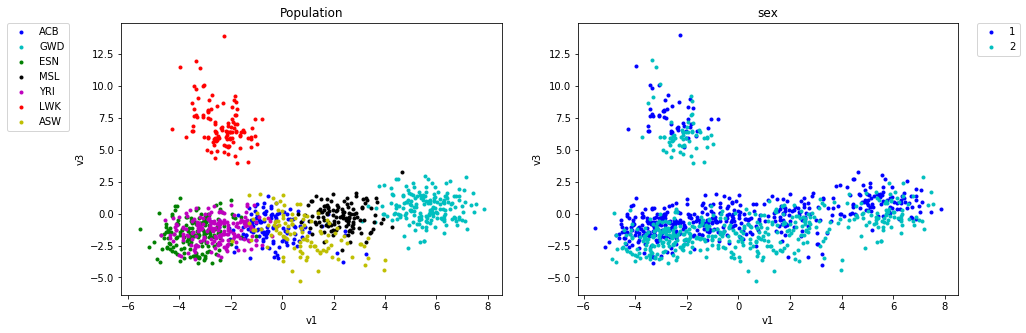

In [169]:
X_3 = X_pca[:,[1,3]]
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title("Population")
plt.xlabel('v1')
plt.ylabel('v3')
for population in population_dict.keys():
    indexes = np.where(X_origin[:,2]==population)
    scatter_plot = plt.scatter(X_3[indexes,0], X_3[indexes,1], c=population_dict[population], marker='.')
plt.legend((population_dict.keys()), loc=2, bbox_to_anchor=(-0.3,1),borderaxespad = 0.)

plt.subplot(1, 2, 2)
plt.title("sex")
plt.xlabel('v1')
plt.ylabel('v3')
for sex in sex_dict.keys():
    indexes = np.where(X_origin[:,1]==sex)
    scatter_plot = plt.scatter(X_3[indexes,0], X_3[indexes,1], c=sex_dict[sex], marker='.')
plt.legend((sex_dict.keys()), loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)

### e) Something should have popped out at you in the plot above. In one sentence, what information does the third principal component capture?


### f) nucleobase index vs the absolute value $3^{rd}$ component

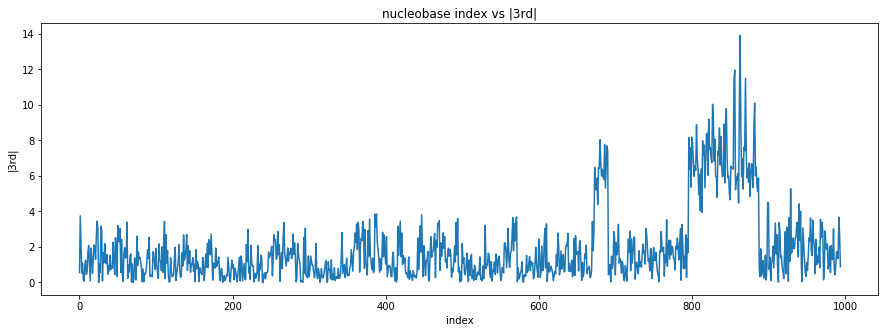

In [173]:
plt.figure(figsize=(15,5))
plt.title("nucleobase index vs |3rd|")
plt.xlabel('index')
plt.ylabel('|3rd|')
plt.plot(range(len(X_3)), np.abs(X_3[:,1]))

### g) ~ j) TODO